In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [259]:
v = pd.read_csv('v201.csv')
v['crushdate'] = pd.to_datetime(v['crushdate'], infer_datetime_format=True)
v.tail()

,crushdate,year,month,pblk,avg_brix,tier,origin,long,lat,yesterday_ddays50,...,humidity_1,humidity_2,humidity_3,cloud_cover_1,cloud_cover_2,cloud_cover_3,maxtemp_1,maxtemp_2,maxtemp_3,time_diff
6098,2014-09-17,2014,9,138553,25.471429,VAL,CAL,-8469.2237,2653.3059,24.03,...,4.985406,56.870290,-0.058875,47.576303,-6.902911,-7.489102,6729.152438,5.386410,-0.172832,78
6099,2014-09-18,2014,9,102722,23.533333,OAK,LDT,-8506.0542,2681.2464,22.29,...,5.213777,58.821047,1.169062,54.530384,-17.834420,-14.386652,6644.170037,9.770275,1.167371,79
6100,2014-09-18,2014,9,131157,26.166667,VAL,CAL,-8475.6392,2657.1293,24.57,...,5.043957,57.186324,0.197274,46.818752,-11.441350,-9.490292,6714.229281,3.716271,-3.304802,79
6101,2014-09-18,2014,9,133581,27.275000,OAK,LDT,-8507.8084,2685.4520,23.02,...,5.189385,58.561797,1.032702,54.900021,-17.776238,-17.790562,6661.151729,5.188015,-2.016810,79
6102,2014-09-18,2014,9,138553,24.934783,VAL,CAL,-8469.2237,2653.3059,25.37,...,4.985406,56.870290,-0.058875,47.576303,-6.902911,-7.489102,6729.152438,5.386410,-0.172832,79


In [260]:
lr_precip_intensity_adj = pd.read_csv('lr_precip_intensity_adj.csv')
v = pd.merge(v, lr_precip_intensity_adj, how="left", on='pblk')

lr_dew_point = pd.read_csv('lr_dew_point.csv')
v = pd.merge(v, lr_dew_point, how="left", on='pblk')

lr_wind_speed = pd.read_csv('lr_wind_speed.csv')
v = pd.merge(v, lr_wind_speed, how="left", on='pblk')

In [261]:
v.head()

,crushdate,year,month,pblk,avg_brix,tier,origin,long,lat,yesterday_ddays50,...,time_diff,precip_intensity_adj_1,precip_intensity_adj_2,precip_intensity_adj_3,dew_point_1,dew_point_2,dew_point_3,wind_speed_1,wind_speed_2,wind_speed_3
0,2001-08-11,2001,8,100094,22.900000,TLV,CAL,-8493.8518,2666.9468,20.11,...,41,12.407639,-2.707115,-0.700358,4125.090376,0.183495,-5.211436,515.986046,-222.910464,-73.488280
1,2001-08-11,2001,8,101177,23.200000,TLV,CAL,-8493.5375,2669.7853,20.81,...,41,12.999425,-3.264817,-0.098989,4128.209953,0.143645,-4.695178,503.338956,-215.340856,-73.222532
2,2001-08-11,2001,8,101545,22.571429,EJG,CAL,-8472.4521,2634.5172,22.42,...,41,10.235580,0.220781,-2.983798,4076.917825,-1.284886,-6.337803,515.317135,-236.107200,-65.948627
3,2001-08-11,2001,8,101669,21.675000,EJG,CAL,-8454.9913,2617.1782,23.55,...,41,10.047115,0.897956,-2.877895,4075.718767,-0.944277,-3.299170,500.669336,-230.924763,-64.681270
4,2001-08-11,2001,8,102031,23.550000,TLV,CAL,-8483.9258,2667.5747,21.44,...,41,11.610028,-1.849053,-1.498552,4119.498160,-0.279835,-5.062813,446.205289,-195.219930,-63.916341


In [262]:
# Standardize continuous columns and create dummy for categorical
#categorical = ['tier', 'pblk']
useless = ['crushdate', 'month', 'origin']

#for item in categorical:
#    dummy = pd.get_dummies(v[item], prefix=item)
#    v = v.join(dummy.ix[:, :])
#    v = v.drop(item, axis=1)
    
v = v.drop(useless, axis=1)

In [263]:
elnino = pd.read_csv('el nino.csv')

In [264]:
elnino.head()

,year,1,2,3,4,5,6,7,8,9,10,11,12
0,1950,-0.6,-0.6,-0.5,-0.6,-0.7,-0.8,-0.8,-0.6,-0.2,0.2,0.2,0.4
1,1951,0.5,0.7,0.8,0.9,0.7,0.6,0.5,0.4,0.4,0.4,0.4,0.2
2,1952,0.0,0.1,0.2,0.2,0.2,0.3,0.5,0.6,0.7,0.7,0.7,0.7
3,1953,0.7,0.7,0.8,0.8,0.8,0.7,0.7,0.4,0.0,-0.4,-0.5,-0.5
4,1954,-0.5,-0.7,-0.7,-0.6,-0.5,-0.5,-0.6,-0.6,-0.7,-0.7,-0.7,-0.6


In [265]:
v = pd.merge(v, elnino, how="left", on='year')

In [266]:
#continuous = ['long', 'lat', 'yesterday_ddays50', 'yesterday_ddays50_97', 'yesterday_ddays97', 'yesterday_humidity', 
#              'yesterday_cloud_cover', 'yesterday_pressure', 'yesterday_maxtemp', 'yesterday_mintemp',
#              'yesterday_meantemp', 'yesterday_precip_intensity', 'last_week_ddays50', 'last_week_ddays50_97',
#              'last_week_ddays97', 'last_week_humidity', 'last_week_cloud_cover', 'last_week_pressure',
#              'last_week_maxtemp', 'last_week_mintemp', 'last_week_meantemp', 'last_week_precip_intensity',
#              'last_month_ddays50', 'last_month_ddays50_97', 'last_month_ddays97', 'last_month_humidity',
#              'last_month_cloud_cover', 'last_month_pressure', 'last_month_maxtemp', 'last_month_mintemp',
#              'last_month_meantemp', 'last_month_precip_intensity', 'last_2week_ddays50', 'last_2week_ddays50_97',
#              'last_2week_ddays97', 'last_2week_humidity', 'last_2week_cloud_cover', 'last_2week_pressure',
#              'last_2week_maxtemp','last_2week_mintemp', 'last_2week_meantemp', 'last_2week_precip_intensity', 'three_month_before_ddays50', 'three_month_before_ddays50_97', 
#              'three_month_before_ddays97', 'three_month_before_humidity', 'three_month_before_cloud_cover', 
#              'three_month_before_pressure', 'three_month_before_maxtemp', 'three_month_before_mintemp', 
#              'three_month_before_meantemp', 'three_month_before_precip_intensity', 'four_month_before_ddays50', 
#              'four_month_before_ddays50_97', 'four_month_before_ddays97', 'four_month_before_humidity',
#              'four_month_before_cloud_cover', 'four_month_before_pressure', 'four_month_before_maxtemp',
#              'four_month_before_mintemp', 'four_month_before_meantemp', 'four_month_before_precip_intensity',
#              'five_month_before_ddays50', 'five_month_before_ddays50_97', 'five_month_before_ddays97',
#              'five_month_before_humidity', 'five_month_before_cloud_cover', 'five_month_before_pressure',
#              'five_month_before_maxtemp', 'five_month_before_mintemp', 'five_month_before_meantemp',
#              'five_month_before_precip_intensity', 'six_month_before_ddays50', 'six_month_before_ddays50_97',
#              'six_month_before_ddays97', 'six_month_before_humidity', 'six_month_before_cloud_cover',
#              'six_month_before_pressure', 'six_month_before_maxtemp', 'six_month_before_mintemp',
#              'six_month_before_meantemp', 'six_month_before_precip_intensity', 'seven_month_before_ddays50',
#              'seven_month_before_ddays50_97', 'seven_month_before_ddays97', 'seven_month_before_humidity',
#              'seven_month_before_cloud_cover', 'seven_month_before_pressure', 'seven_month_before_maxtemp',
#              'seven_month_before_mintemp', 'seven_month_before_meantemp', 'seven_month_before_precip_intensity',
#              'eight_month_before_ddays50', 'eight_month_before_ddays50_97', 'eight_month_before_ddays97',
#              'eight_month_before_humidity', 'eight_month_before_cloud_cover', 'eight_month_before_pressure',
#              'eight_month_before_maxtemp', 'eight_month_before_mintemp', 'eight_month_before_meantemp',
#              'eight_month_before_precip_intensity', 'ddays50_1', 'ddays50_2', 'ddays50_3', 'humidity_1',
#              'humidity_2', 'humidity_3', 'cloud_cover_1', 'cloud_cover_2', 'cloud_cover_3', 'maxtemp_1',
#              'maxtemp_2', 'maxtemp_3', 'precip_intensity_adj_1', 'precip_intensity_adj_2',
#              'precip_intensity_adj_3', 'dew_point_1', 'dew_point_2', 'dew_point_3', 'wind_speed_1',
#              'wind_speed_2', 'wind_speed_3', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

#scalar = preprocessing.StandardScaler()
#scalar.fit(v[continuous])
#v[continuous] = scalar.transform(v[continuous])

In [267]:
v['1'].describe()

count    6103.000000
mean        0.020744
std         0.398821
min        -0.800000
25%        -0.300000
50%         0.000000
75%         0.200000
max         0.800000
Name: 1, dtype: float64

In [268]:
#y = v['avg_brix']
#X = v.drop(['avg_brix', 'year'], axis=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [269]:
#X_train.to_csv('xtrain.csv')
#X_test.to_csv('xtest.csv')
#y_train.to_csv('ytrain.csv')
#y_test.to_csv('ytest.csv')

In [270]:
v.columns = ['year',
 'pblk',
 'avg_brix',
 'tier',
 'long',
 'lat',
 'yesterday_ddays50',
 'yesterday_ddays50_97',
 'yesterday_ddays97',
 'yesterday_humidity',
 'yesterday_cloud_cover',
 'yesterday_pressure',
 'yesterday_maxtemp',
 'yesterday_mintemp',
 'yesterday_meantemp',
 'yesterday_precip_intensity',
 'last_week_ddays50',
 'last_week_ddays50_97',
 'last_week_ddays97',
 'last_week_humidity',
 'last_week_cloud_cover',
 'last_week_pressure',
 'last_week_maxtemp',
 'last_week_mintemp',
 'last_week_meantemp',
 'last_week_precip_intensity',
 'last_month_ddays50',
 'last_month_ddays50_97',
 'last_month_ddays97',
 'last_month_humidity',
 'last_month_cloud_cover',
 'last_month_pressure',
 'last_month_maxtemp',
 'last_month_mintemp',
 'last_month_meantemp',
 'last_month_precip_intensity',
 'last_2week_ddays50',
 'last_2week_ddays50_97',
 'last_2week_ddays97',
 'last_2week_humidity',
 'last_2week_cloud_cover',
 'last_2week_pressure',
 'last_2week_maxtemp',
 'last_2week_mintemp',
 'last_2week_meantemp',
 'last_2week_precip_intensity',
 'three_month_before_ddays50',
 'three_month_before_ddays50_97',
 'three_month_before_ddays97',
 'three_month_before_humidity',
 'three_month_before_cloud_cover',
 'three_month_before_pressure',
 'three_month_before_maxtemp',
 'three_month_before_mintemp',
 'three_month_before_meantemp',
 'three_month_before_precip_intensity',
 'four_month_before_ddays50',
 'four_month_before_ddays50_97',
 'four_month_before_ddays97',
 'four_month_before_humidity',
 'four_month_before_cloud_cover',
 'four_month_before_pressure',
 'four_month_before_maxtemp',
 'four_month_before_mintemp',
 'four_month_before_meantemp',
 'four_month_before_precip_intensity',
 'five_month_before_ddays50',
 'five_month_before_ddays50_97',
 'five_month_before_ddays97',
 'five_month_before_humidity',
 'five_month_before_cloud_cover',
 'five_month_before_pressure',
 'five_month_before_maxtemp',
 'five_month_before_mintemp',
 'five_month_before_meantemp',
 'five_month_before_precip_intensity',
 'six_month_before_ddays50',
 'six_month_before_ddays50_97',
 'six_month_before_ddays97',
 'six_month_before_humidity',
 'six_month_before_cloud_cover',
 'six_month_before_pressure',
 'six_month_before_maxtemp',
 'six_month_before_mintemp',
 'six_month_before_meantemp',
 'six_month_before_precip_intensity',
 'seven_month_before_ddays50',
 'seven_month_before_ddays50_97',
 'seven_month_before_ddays97',
 'seven_month_before_humidity',
 'seven_month_before_cloud_cover',
 'seven_month_before_pressure',
 'seven_month_before_maxtemp',
 'seven_month_before_mintemp',
 'seven_month_before_meantemp',
 'seven_month_before_precip_intensity',
 'eight_month_before_ddays50',
 'eight_month_before_ddays50_97',
 'eight_month_before_ddays97',
 'eight_month_before_humidity',
 'eight_month_before_cloud_cover',
 'eight_month_before_pressure',
 'eight_month_before_maxtemp',
 'eight_month_before_mintemp',
 'eight_month_before_meantemp',
 'eight_month_before_precip_intensity',
 'ddays50_1',
 'ddays50_2',
 'ddays50_3',
 'humidity_1',
 'humidity_2',
 'humidity_3',
 'cloud_cover_1',
 'cloud_cover_2',
 'cloud_cover_3',
 'maxtemp_1',
 'maxtemp_2',
 'maxtemp_3',
 'time_diff',
 'precip_intensity_adj_1',
 'precip_intensity_adj_2',
 'precip_intensity_adj_3',
 'dew_point_1',
 'dew_point_2',
 'dew_point_3',
 'wind_speed_1',
 'wind_speed_2',
 'wind_speed_3',
 'yearly_elnino_jja',
 'yearly_elnino_jas',
 'yearly_elnino_aso',
 'yearly_elnino_son',
 'yearly_elnino_ond',
 'yearly_elnino_ndj',
 'yearly_elnino_djf',
 'yearly_elnino_jfm',
 'yearly_elnino_fma',
 'yearly_elnino_mam',
 'yearly_elnino_amj',
 'yearly_elnino_mjj']

In [271]:
col = ['year',
 'pblk',
 'avg_brix',
'time_diff',
 'tier',
 'long',
 'lat',
 'ddays50_1',
 'ddays50_2',
 'ddays50_3',
 'humidity_1',
 'humidity_2',
 'humidity_3',
 'cloud_cover_1',
 'cloud_cover_2',
 'cloud_cover_3',
 'maxtemp_1',
 'maxtemp_2',
 'maxtemp_3',
 'precip_intensity_adj_1',
 'precip_intensity_adj_2',
 'precip_intensity_adj_3',
 'dew_point_1',
 'dew_point_2',
 'dew_point_3',
 'wind_speed_1',
 'wind_speed_2',
 'wind_speed_3',
 'yearly_elnino_jja',
 'yearly_elnino_jas',
 'yearly_elnino_aso',
 'yearly_elnino_son',
 'yearly_elnino_ond',
 'yearly_elnino_ndj',
 'yearly_elnino_djf',
 'yearly_elnino_jfm',
 'yearly_elnino_fma',
 'yearly_elnino_mam',
 'yearly_elnino_amj',
 'yearly_elnino_mjj']
v = v[col]

In [272]:
#train = v[v['year'] != 2014]
#test = v[v['year'] == 2014]
#train = train.drop('year', axis=1)
#test = test.drop('year', axis=1)

In [273]:
#y_train = train['avg_brix']
#X_train = train.drop('avg_brix', axis=1)
#y_test = test['avg_brix']
#X_test = test.drop('avg_brix', axis=1)

In [274]:
# Construct training set for smooth regularization

# Check if there is new pblk and new tier in 2014, no
# s1 = set(X_train['pblk'].unique().tolist())
# s2 = set(X_test['pblk'].unique().tolist())

#X_train = X_train.sort_values(['pblk', 'tier'])
#X_train_smooth = pd.DataFrame()
#groups = X_train.groupby(['pblk', 'tier'])
#for key, df in groups:
#    temp = df[col[4 :]].copy()
#    temp[str(key[0]) + key[1]] = temp['time_diff']
#    temp = temp.drop('time_diff', axis=1)
#    X_train_smooth = X_train_smooth.append(temp)

In [275]:
#X_train_smooth = X_train_smooth.fillna(value=0)

In [276]:
# Construct test set
#X_test_smooth = pd.DataFrame()
#groups = X_test.groupby(['pblk', 'tier'])
#for key, df in groups:
#    temp = df[col[4 :]].copy()
#    temp[str(key[0]) + key[1]] = temp['time_diff']
#    temp = temp.drop('time_diff', axis=1)
#    X_test_smooth = X_test_smooth.append(temp)

In [277]:
# Add intercept
#X_train_smooth['intercept'] = 1
#X_test_smooth['intercept'] = 1

#train_test = X_train_smooth.append(X_test_smooth)
#train_test = train_test.fillna(value=0)
#X_train = train_test.iloc[:X_train_smooth.shape[0]]
#X_test = train_test.iloc[X_train_smooth.shape[0]:]

In [278]:
#len(X_test.columns.tolist())

# Neural Net

In [22]:
#from keras.models import Sequential
#from keras.layers import Dense

#model = Sequential()
#model.add(Dense(300, input_dim=X_train.shape[1], init='uniform', activation='relu'))
#model.add(Dense(20, init='uniform', activation='relu'))
#model.add(Dense(1, init='uniform'))
# Compile model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
# Fit the model
#model.fit(X_train.as_matrix(), y_train.as_matrix(), nb_epoch=100, batch_size=10)

# evaluate the model
#scores = model.evaluate(X_test.as_matrix(), y_test.as_matrix())
#print(model.metrics_names[1],':',scores[1])

# Test on artificial data and try to extrapolate

In [23]:
#a = pd.read_csv('artificial_test.csv')
#a = a.drop('Unnamed: 0', axis=1)
#a.shape[1]

In [24]:
#a_brix = model.predict(a.as_matrix())
#a_brix

# Plot the extrapolated part

In [25]:
#v = pd.read_csv('v201.csv')
#v['crushdate'] = pd.to_datetime(v['crushdate'], infer_datetime_format=True)
#sub_v = v[(v['pblk'] == 100966) & (v['year'] == 2014) & (v['tier'] == 'OAK')]

In [26]:
#from datetime import date
#import matplotlib.pyplot as plt
#%matplotlib inline

In [27]:
#start_date = date(2014, 8, 15)
#end_date = date(2014, 9, 11)
#a['crushdate'] = pd.date_range(start_date, end_date)

#plt.plot(sub_v['crushdate'], sub_v['avg_brix'])
#plt.plot(a['crushdate'], a_brix)
#plt.ylim(20, 26)

In [28]:
#start_date = date(2014, 8, 15)
#end_date = date(2014, 9, 1)
#a['crushdate'] = pd.date_range(start_date, end_date)

#plt.plot(sub_v['crushdate'], sub_v['avg_brix'])
#plt.plot(a['crushdate'], a_brix)
#plt.ylim(20, 26)

## Sparse regression

In [29]:
#model = Lasso(alpha=0.002, max_iter=4000)
#model.fit(X_train, y_train)
#print('Training R^2 score: ', model.score(X_train, y_train))
#print('Test R^2 score: ', model.score(X_test, y_test))

# calculate mean absolute error for training set
#y_pred = model.predict(X_test)
#print('Mean absolute error: ', abs(y_test - y_pred).mean())
#print('Mean absolute percentage error: ', (abs(y_test - y_pred) / y_test).mean())

#coef = pd.DataFrame(columns=['feature', 'coef'])
#coef['feature'] = X_train.columns.tolist()
#coef['coef'] = model.coef_
#coef['abs_coef'] = coef['coef'].apply(abs)

#print('Intercept: ', model.intercept_)

#coef = coef.sort_values('abs_coef', ascending=False)
#coef[['feature', 'coef']].head(30)

## Gradient boosting regressor

In [30]:
#model = GradientBoostingRegressor(loss='huber', learning_rate=0.01, n_estimators=50, max_features=None, max_depth=30)
#model.fit(X_train, y_train)
#print('Training R^2 score: ', model.score(X_train, y_train))
#print('Test R^2 score: ', model.score(X_test, y_test))

# calculate mean absolute error for training set
#y_pred = model.predict(X_test)
#print('Mean absolute error: ', abs(y_test - y_pred).mean())
#print('Mean absolute percentage error: ', (abs(y_test - y_pred) / y).mean())

#importance = pd.DataFrame(columns=['feature', 'importance'])
#importance['feature'] = X.columns.tolist()
#importance['importance'] = model.feature_importances_

#importance = importance.sort_values('importance', ascending=False)
#importance.head(30)

# Try Sparse Regression with CVXPY

In [26]:
import cvxpy as cv

In [32]:
# Define parameter
#x = np.asmatrix(X_train)
#y = np.asmatrix(y_train).T

#x_test = np.asmatrix(X_test)
#y_test = np.asmatrix(y_test).T

In [33]:
# Define variable w, the coefficient of each feature
#alpha_1 = 0.1
#alpha_2 = 5
#w = cv.Variable(x.shape[1])

# Define constraints and objective
#constraints = [w[:814] > 0]
#obj = cv.Minimize(cv.sum_entries(cv.huber(x * w - y)) + alpha_1 * cv.norm(w[814:], 1) + alpha_2 * cv.norm(w[:814], 1))

# Solve problem
#prob = cv.Problem(obj, constraints)
#prob.solve()
#print('objective value: ', prob.value)
#print('status:', prob.status)
    
#y_pred = x_test * w.value
#mae = abs(y_pred - y_test).mean()
#print(mae)

In [34]:
#features = pd.DataFrame(columns=['feature', 'coef'])
#features['feature'] = X_train.columns.tolist()
#features['coef'] = w.value
#features['coef_abs'] = abs(features['coef'])
#features = features.sort_values('coef_abs', ascending=False)
#features[['feature', 'coef']].head(30)

In [35]:
#features['is_pblk'] = features['feature'].apply(lambda x: 1 if 'pblk' in x else 0)
#features['is_tier'] = features['feature'].apply(lambda x: 1 if 'tier' in x else 0)
#features['is_origin'] = features['feature'].apply(lambda x: 1 if 'origin' in x else 0)
#features['is_yearly'] = features['feature'].apply(lambda x: 1 if 'yearly' in x else 0)
#features.set_value(0, 'is_pblk', 1)
#features.set_value(1, 'is_pblk', 1);

In [36]:
#sub = features[(features['is_pblk'] != 1) & (features['is_tier'] != 1) & (features['is_yearly'] != 1) & (features['is_origin'] != 1)]
#sub.head(5)

In [37]:
#count = X_train[X_train.columns.tolist()[:814]].astype(bool).sum(axis=0).tolist()
#sub = features.sort_values('feature').iloc[0:814].copy()
#sub['count'] = count
#sub = sub.sort_values('coef', ascending=False)
#sub.head(5)

In [38]:
#X_train.columns.tolist()[44]

In [39]:
#w.value[44]

In [40]:
#np.asmatrix(X_test[X_test['100966OAK'] > 0].iloc[0][814:]) * w.value[814:]

We want to fit one line to all the points in one pblk for one tier across all years. To do that, we first generate sets training data.

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

In [279]:
v['int'] = 1
dummy = pd.get_dummies(v['tier'], prefix='tier')
v = v.join(dummy.ix[:, :])

In [280]:
all_train = v[v['year'] != 2014]
test = v[v['year'] == 2014]

In [29]:
#poly = preprocessing.PolynomialFeatures()
#v_a = v[['year', 'pblk', 'avg_brix', 'tier', 'time_diff']]
#v_b = v.drop(['year', 'pblk', 'avg_brix', 'tier', 'time_diff'], axis=1)

#for item in v_b.columns.tolist():
#    v_b[item + '_2'] = v_b[item] ** 2
#v_poly = poly.fit_transform(v_b)
#v_poly = v_a.join(pd.DataFrame(v_b))

In [201]:
#all_train_interc = v[v['year'] != 2014]
##test_interc = v[v['year'] == 2014]
#all_train_interc['int'] = 1
#test_interc['int'] = 1

In [282]:
all_train.columns.tolist()

['year',
 'pblk',
 'avg_brix',
 'time_diff',
 'tier',
 'long',
 'lat',
 'ddays50_1',
 'ddays50_2',
 'ddays50_3',
 'humidity_1',
 'humidity_2',
 'humidity_3',
 'cloud_cover_1',
 'cloud_cover_2',
 'cloud_cover_3',
 'maxtemp_1',
 'maxtemp_2',
 'maxtemp_3',
 'precip_intensity_adj_1',
 'precip_intensity_adj_2',
 'precip_intensity_adj_3',
 'dew_point_1',
 'dew_point_2',
 'dew_point_3',
 'wind_speed_1',
 'wind_speed_2',
 'wind_speed_3',
 'yearly_elnino_jja',
 'yearly_elnino_jas',
 'yearly_elnino_aso',
 'yearly_elnino_son',
 'yearly_elnino_ond',
 'yearly_elnino_ndj',
 'yearly_elnino_djf',
 'yearly_elnino_jfm',
 'yearly_elnino_fma',
 'yearly_elnino_mam',
 'yearly_elnino_amj',
 'yearly_elnino_mjj',
 'int',
 'tier_APT',
 'tier_BWS',
 'tier_CHP',
 'tier_EJG',
 'tier_FRU',
 'tier_GBV',
 'tier_GLC',
 'tier_JCE',
 'tier_MRU',
 'tier_OAK',
 'tier_OFX',
 'tier_OKX',
 'tier_PRE',
 'tier_PRS',
 'tier_RWC',
 'tier_SVL',
 'tier_TLV',
 'tier_VAL']

for one pblk, one tier in one year, we have a row vector $a$ that describe the year (34 elements)
we construct a column vector $w$ with 37 element such that $aw$ is the slope of the line.

In [283]:
# Predict slope only
groups = all_train.groupby(['pblk', 'tier', 'year'])

all_year = []
all_x = []
all_y = []
all_center = []
all_title = []
loss = []
w = cv.Variable(36)
alpha = 50

for key, df in groups:
    all_center.append((df['avg_brix'].mean(), df['time_diff'].mean()))
    all_year.append(np.asmatrix(df.iloc[0][5:41]))
    #a = year * w
    all_y.append(np.asmatrix(df['avg_brix']).T)
    all_x.append(np.asmatrix(df['time_diff']).T)
    all_title.append(key)
    #loss += cv.sum_entries(y - center[0] - a * (x - cneter[1]))

constraints = []
for i in range(len(all_x)):
    constraints.append(all_year[i] * w > 0)
    #constraints.append(all_year[i] * v > 0)
    
# loss function
for i in range(len(all_x)):
    loss.append(cv.sum_entries(cv.huber((all_y[i] - all_center[i][0]) - all_year[i] * w * (all_x[i] - all_center[i][1]))))    

obj = cv.Minimize(sum(loss) + alpha * cv.sum_squares(w))

# Solve problem
prob = cv.Problem(obj, constraints)
prob.solve()
print('objective value: ', prob.value)
print('status:', prob.status)

objective value:  870.0082649725183
status: optimal


In [284]:
# calculate mean absolute error
mae = 0
for i in range(len(all_x)):
    mae += sum(abs(all_y[i] - all_center[i][0] - float(all_year[i] * w.value) * (all_x[i] - all_center[i][1])))
print('mean absolute error:', float(mae / all_train.shape[0]))

mean absolute error: 0.26739255610283424


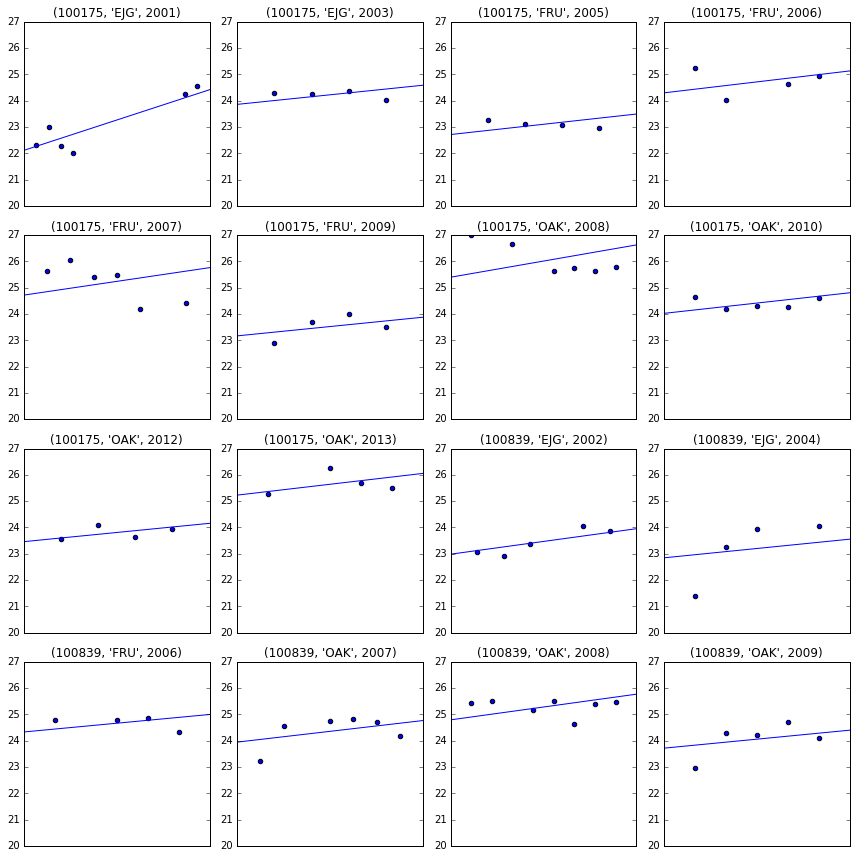

In [285]:
# plot fitted line on training set
# i = 20 (bad), 100, 151, 1, 2000
#i = 100
count = 1
fig = plt.figure(figsize=(12, 12))
for i in range(0, len(all_year)):
    if len(all_x[i]) >= 4:
        a = all_year[i] * w.value
        #b = all_year[i] * v.value
        #x_min = float(min(all_x[i]) - 1)
        #x_max = float(max(all_x[i]) + 1)
        x = all_center[i][1]
        y = all_center[i][0]
        plt.subplot(4, 4, count)
        plt.plot([x - 10, x + 10], [float(y - 10 * a), float(y + 10 * a)])
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.ylim(20, 27)
        plt.scatter(all_x[i], all_y[i])
        plt.xlim(min(all_x[i]) - 1, max(all_x[i]) + 1)
        plt.title(all_title[i])
        plt.tight_layout()
        count += 1
        if count == 17:
            break
            
#fig.savefig('fit slope train.pdf', format='pdf')

In [289]:
groups_test = test.groupby(['pblk', 'tier', 'year'])
all_year_test = []
all_x_test = []
all_y_test = []
#all_center_test = []
all_title_test = []

for key, df in groups_test:
    #all_center_test.append((df['avg_brix'].mean(), df['time_diff'].mean()))
    all_year_test.append(np.asmatrix(df.iloc[0][5:41]))
    #a = year * w
    all_y_test.append(np.asmatrix(df['avg_brix']).T)
    all_x_test.append(np.asmatrix(df['time_diff']).T)
    all_title_test.append(key)

In [290]:
# calculate mean absolute error on test set
mae = 0
for i in range(len(all_x_test)):
    mae += sum(abs(all_y_test[i] - all_center_test[i][0] - float(all_year_test[i] * w.value) * (all_x_test[i] - all_center_test[i][1])))
print('mean absolute error:', float(mae / test.shape[0]))

mean absolute error: 0.2810858022546246


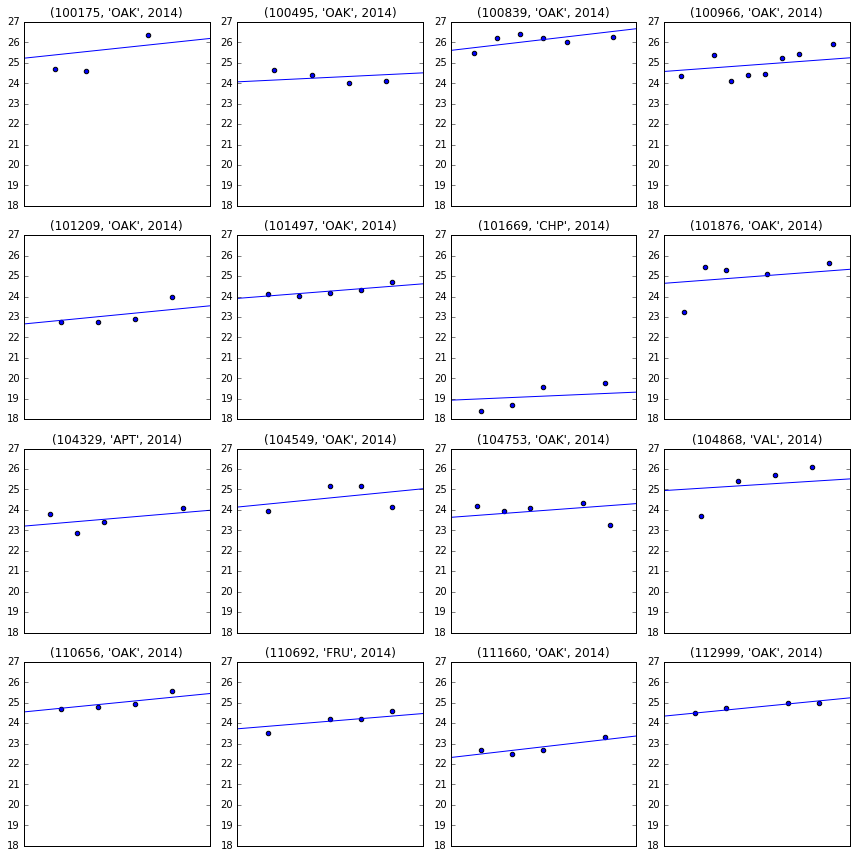

In [291]:
# Plot line on test set
# i = 0, 110, 115
#i = 115


count = 1
fig = plt.figure(figsize=(12, 12))
for i in range(0, len(all_year_test)):
    if len(all_x_test[i]) >= 4:
        a = all_year_test[i] * w.value
        x = all_center_test[i][1]
        y = all_center_test[i][0]
        plt.subplot(4, 4, count)
        plt.plot([x - 10, x + 10], [float(y - 10 * a), float(y + 10 * a)])
        plt.gca().axes.get_xaxis().set_visible(False)
        plt.ylim(18, 27)
        plt.scatter(all_x_test[i], all_y_test[i])
        plt.xlim(min(all_x_test[i]) - 1, max(all_x_test[i]) + 1)
        plt.title(all_title_test[i])
        plt.tight_layout()
        count += 1
        if count == 17:
            break
            
#fig.savefig('fit slope test.pdf', format='pdf')

#a = all_year_test[i] * w.value
#x = all_center_test[i][1]
#y = all_center_test[i][0]
#plt.plot([x - 10, x + 10], [float(y - 10 * a), float(y + 10 * a)])
#plt.scatter(all_x_test[i], all_y_test[i])
#plt.xlim(min(all_x_test[i]) - 1, max(all_x_test[i]) + 1)
#plt.title(all_title_test[i])

(array([ 110.,  251.,  342.,  506.,  479.,  356.,  221.,  115.,   46.,   11.]),
 array([ -8.76004419e-09,   2.33151165e-02,   4.66302417e-02,
          6.99453669e-02,   9.32604922e-02,   1.16575617e-01,
          1.39890743e-01,   1.63205868e-01,   1.86520993e-01,
          2.09836118e-01,   2.33151244e-01]),
 <a list of 10 Patch objects>)

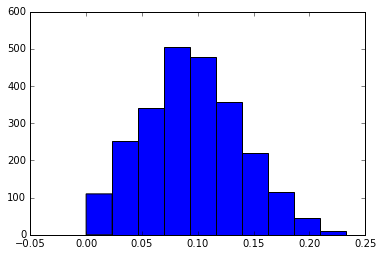

In [292]:
slope = []
for i in range(len(all_year)):
    slope.append(float(all_year[i] * w.value))
plt.hist(slope)

In [293]:
#count = 0
#for i in range(len(all_x_test)):
#    if len(all_x_test[i]) > 4:
#        a = all_year_test[i] * w.value
#        x = all_center_test[i][1]
#        y = all_center_test[i][0]
#        plt.plot([x - 20, x + 20], [float(y - 20 * a), float(y + 20 * a)])
#        plt.scatter(all_x_test[i], all_y_test[i])
#        plt.xlim(min(all_x_test[i]) - 1, max(all_x_test[i]) + 1)
#        plt.title(all_title_test[i])
        #plt.xlim(30, 60)
#        plt.show()
#        count += 1
#        if count >= 20:
#            break

In [294]:
slope_test = []
for i in range(len(all_year_test)):
    slope_test.append(float(all_year_test[i] * w.value))
#plt.hist(slope)

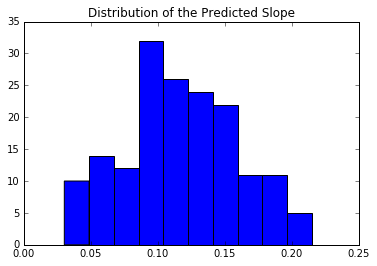

In [295]:
#fig = plt.figure(figsize=(10, 6))
plt.hist(slope_test, bins=10)
plt.title('Distribution of the Predicted Slope')
#fig.savefig('slope dist.pdf', format='pdf')

# -------

In [350]:
# Then predict intercept
groups = all_train.groupby(['pblk', 'tier', 'year'])

all_year = []
mu = cv.Variable(54)
alpha = 200

for key, df in groups:
    all_year.append(np.asmatrix(df.iloc[0][5:]))

constraints = []
#constraints.append(mu[36:] < -1)
for i in range(len(all_x)):
    constraints.append(all_year[i] * mu > 0)
    
# loss function
for i in range(len(all_x)):
    loss.append(cv.sum_entries(cv.huber((all_y[i] - all_year[i] * mu) - slope[i] * all_x[i])))
    
obj = cv.Minimize(sum(loss) + alpha * cv.norm(mu[:41], 2))

# Solve problem
prob = cv.Problem(obj, constraints)
prob.solve()
print('objective value: ', prob.value)
print('status:', prob.status)

objective value:  64948.59233733138
status: optimal


In [351]:
mu.value

matrix([[ -7.13762827e-02],
        [ -1.06393399e-01],
        [  1.27433439e-01],
        [  3.01229827e-01],
        [  3.38409147e+00],
        [  1.99846943e-01],
        [  3.87063423e+00],
        [ -5.38615208e-01],
        [  3.42233550e-01],
        [ -2.75932389e-01],
        [  1.47688397e-01],
        [ -4.78661032e-02],
        [ -2.14615247e-02],
        [ -3.52612258e-01],
        [ -3.43586031e+00],
        [ -4.70754360e+00],
        [ -3.39512025e+00],
        [ -8.92899722e-02],
        [ -5.87971807e-01],
        [  9.17301005e-01],
        [ -7.47547461e-03],
        [  2.17664698e-03],
        [  2.44634723e-03],
        [ -8.33973072e-01],
        [  2.74540276e+00],
        [  8.14181497e-01],
        [ -3.97946540e+00],
        [ -7.81984715e-01],
        [  5.06074472e+00],
        [ -1.90726255e+00],
        [ -2.53585939e+00],
        [ -3.24799640e-01],
        [  2.50518071e+00],
        [  6.20464297e-01],
        [ -5.32348948e-01],
        [ -4.9314765

(array([  13.,   77.,  262.,  360.,  469.,  428.,  450.,  271.,   84.,   23.]),
 array([  9.59081018,  11.13461196,  12.67841374,  14.22221553,
         15.76601731,  17.30981909,  18.85362087,  20.39742265,
         21.94122444,  23.48502622,  25.028828  ]),
 <a list of 10 Patch objects>)

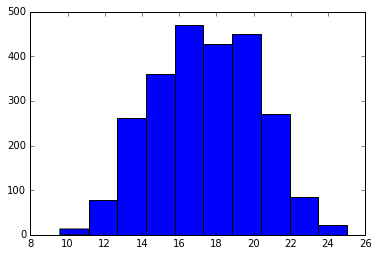

In [352]:
intercept = []
for i in range(len(all_year)):
    intercept.append(float(all_year[i] * mu.value))
plt.hist(intercept)

(array([  9.,  29.,  12.,  30.,  24.,  27.,  16.,  13.,   4.,   3.]),
 array([ 12.87749226,  14.07209101,  15.26668975,  16.4612885 ,
         17.65588724,  18.85048599,  20.04508473,  21.23968348,
         22.43428222,  23.62888097,  24.82347971]),
 <a list of 10 Patch objects>)

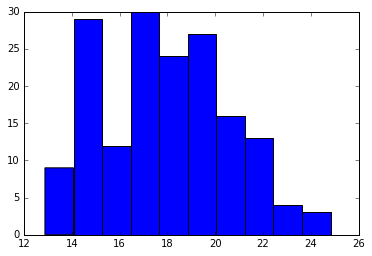

In [353]:
groups_test = test.groupby(['pblk', 'tier', 'year'])
all_year_test = []

for key, df in groups_test:
    all_year_test.append(np.asmatrix(df.iloc[0][5:]))

intercept_test = []
for i in range(len(all_year_test)):
    intercept_test.append(float(all_year_test[i] * mu.value))
plt.hist(intercept_test)

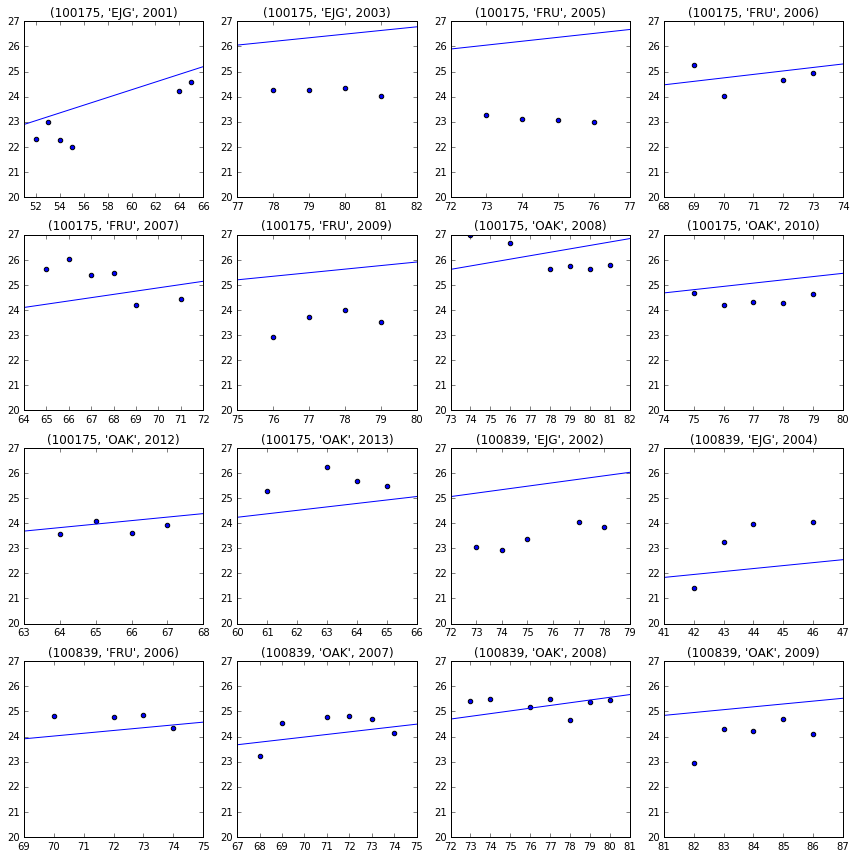

In [354]:
count = 1
fig = plt.figure(figsize=(12, 12))
for i in range(0, len(all_year)):
    if len(all_x[i]) >= 4:
        #x = all_center[i][1]
        #y = all_center[i][0]
        plt.subplot(4, 4, count)
        plt.plot([0, 100], [intercept[i], intercept[i] + slope[i] * 100])
        #plt.gca().axes.get_xaxis().set_visible(False)
        plt.ylim(20, 27)
        plt.scatter(all_x[i], all_y[i])
        plt.xlim(min(all_x[i]) - 1, max(all_x[i]) + 1)
        plt.title(all_title[i])
        plt.tight_layout()
        count += 1
        if count == 17:
            break
            
#fig.savefig('fit slope train.pdf', format='pdf')

In [355]:
# calculate mean absolute error
mae = 0
for i in range(len(all_x)):
    mae += sum(abs(all_y[i] - intercept[i] - slope[i] * all_x[i]))
print('mean absolute error:', float(mae / all_train.shape[0]))

mean absolute error: 1.066267126195341


In [356]:
mae = 0
for i in range(len(all_x_test)):
    mae += sum(abs(all_y_test[i] - intercept_test[i] - slope_test[i] * all_x_test[i]))
print('mean absolute error:', float(mae / test.shape[0]))

mean absolute error: 1.0127876186639828
